In [1]:
#Importing modules
import numpy as np
import  torch
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch import nn
import torch.optim as optim
import tensorflow as tf
import random
import time 

In [2]:
train_dataset = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_dataset = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [3]:
def custom_dataloader(dataset, batch_size, shuffle=True):
  data_list = []
  for i in range(len(dataset)):
    image, label = dataset[i]
    data_list.append((image, label))
  
  if shuffle:
    random.shuffle(data_list)

  for i in range(0, len(data_list), batch_size):
    batch_data = data_list[i:i+batch_size]
    yield batch_data

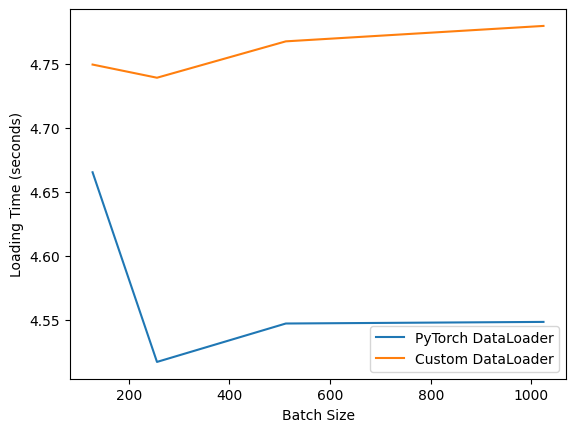

In [4]:
batch_sizes = [128, 256, 512, 1024]
loading_times_pytorch = []
loading_times_custom = []

for batch_size in batch_sizes:
  
  # PyTorch DataLoader
  start_time = time.time()
  train_loader_pytorch = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  for i in train_loader_pytorch:
    pass
  loading_times_pytorch.append(time.time() - start_time)

  # Custom DataLoader
  start_time = time.time()
  custom_loader = custom_dataloader(train_dataset, batch_size=batch_size, shuffle=True)
  for i in custom_loader:
    pass
  loading_times_custom.append(time.time() - start_time)

# Plot results
plt.plot(batch_sizes, loading_times_pytorch, label="PyTorch DataLoader")
plt.plot(batch_sizes, loading_times_custom, label="Custom DataLoader")
plt.xlabel("Batch Size")
plt.ylabel("Loading Time (seconds)")
plt.legend()
plt.show()
